In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mnist-in-csv/mnist_test.csv
/kaggle/input/mnist-in-csv/mnist_train.csv


In [2]:
train_data_mnist = pd.read_csv('/kaggle/input/mnist-in-csv/mnist_train.csv')
test_data_mnist = pd.read_csv('/kaggle/input/mnist-in-csv/mnist_test.csv')

In [3]:
label_mnist = train_data_mnist['label']
mnist = train_data_mnist.drop('label', axis=1)

In [4]:
mnist = mnist.to_numpy()

In [5]:
import matplotlib.pyplot as plt 

def plot_digit(image_data):
    image = image_data.reshape(28,28)
    plt.imshow(image,cmap='binary')

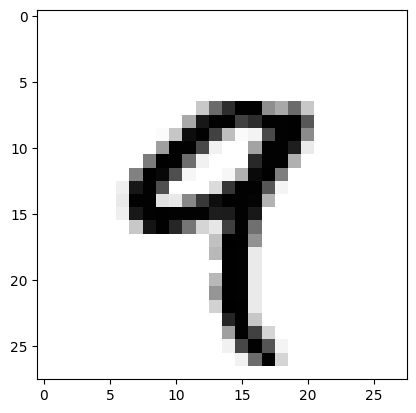

In [6]:
plot_digit(mnist[4])
plt.show()

In [7]:
label_mnist.to_numpy()[4]

9

In [8]:
X = mnist
y = label_mnist.to_numpy()

In [9]:
X_train , X_test , y_train , y_test = X[:45000] , X[45000:] , y[:45000] , y[45000:]

In [10]:
X_train.shape , X_test.shape ,y_train.shape , y_test.shape

((45000, 784), (15000, 784), (45000,), (15000,))

In [11]:
y_test_9 = (y_test == 9) #.reshape(-1,1) 
y_train_9 = (y_train == 9) #.reshape(-1,1)

In [12]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state = 42)
sgd_clf.fit(X_train ,y_train_9 )

SGDClassifier(random_state=42)

In [13]:
some_digit = X[4]
sgd_clf.predict([some_digit])

array([ True])

In [14]:
## Performance measure Data 
from sklearn.model_selection import cross_val_score 
cross_val_score(sgd_clf , X_train , y_train_9 , cv=3 , scoring = 'accuracy')



array([0.93626667, 0.95006667, 0.94306667])

In [15]:
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier()
dummy_clf.fit(X_train, y_train_9)
print(any(dummy_clf.predict(X_train)))

False


In [16]:
cross_val_score(dummy_clf, X_train, y_train_9, cv=3, scoring="accuracy")

array([0.89946667, 0.8994    , 0.8994    ])

In [17]:
from sklearn.model_selection import cross_val_predict 
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_9, cv=3)

In [18]:
y_train_pred

array([False, False, False, ..., False, False, False])

In [19]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_train_9 , y_train_pred)

cm

array([[39266,  1208],
       [ 1351,  3175]])

In [20]:
y_train_perfect_predictions = y_train_9

In [21]:
confusion_matrix(y_train_9 , y_train_perfect_predictions)

array([[40474,     0],
       [    0,  4526]])

In [22]:
from sklearn.metrics import precision_score , recall_score
round(precision_score(y_train_9,y_train_pred)*100,2) , round(recall_score(y_train_9 , y_train_pred)*100,2)

(72.44, 70.15)

In [23]:
from sklearn.metrics import f1_score
f1_score(y_train_9 , y_train_pred)

0.7127623751262768

In [24]:
y_scores = sgd_clf.decision_function([X[4]])
y_scores

array([7469.34431853])

In [25]:
threshold = 0 

In [26]:
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

In [27]:
threshold = 3000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

In [28]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_9, cv=3,
method="decision_function")


In [29]:
y_scores

array([-43352.46063514, -28836.82563982, -17596.85673377, ...,
       -15212.57628774, -86729.88233083, -77545.05487859])

In [30]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_9, y_scores)

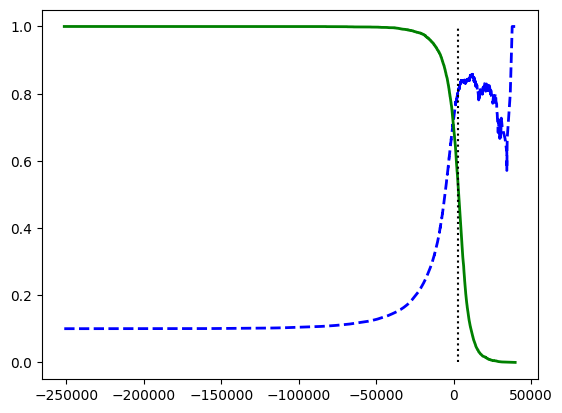

In [31]:
plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
plt.vlines(threshold, 0, 1.0, "k", "dotted", label="threshold")
plt.show()


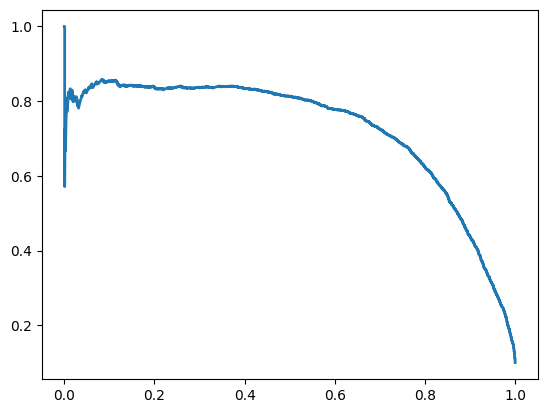

In [32]:
plt.plot(recalls, precisions, linewidth=2, label="Precision/Recall curve")
plt.show()

In [33]:
idx_for_90_precision = (precisions >= 0.90).argmax() 

idx_for_90_precision

44996

In [34]:
threshold_for_90_precision = thresholds[idx_for_90_precision] 
threshold_for_90_precision

37844.73019397187

In [35]:
y_train_pred_90 = y_scores >= threshold_for_90_precision
y_train_pred_90

array([False, False, False, ..., False, False, False])

In [36]:
precision_score(y_train_9, y_train_pred_90)

1.0

In [37]:
recall_score(y_train_9, y_train_pred_90)

0.0008837825894829872

In [38]:
from sklearn.metrics import  roc_curve
fpr, tpr, thresholds = roc_curve(y_train_9, y_scores)

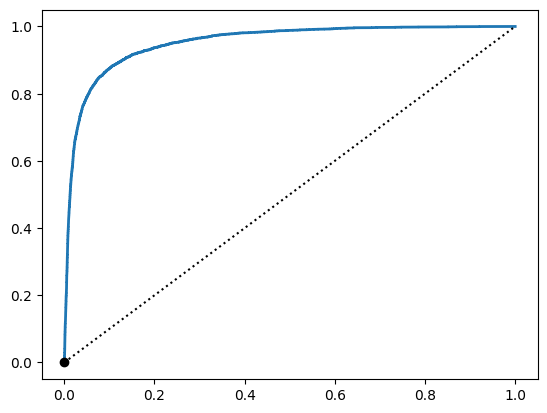

In [39]:
 idx_for_threshold_at_90 = (thresholds <= threshold_for_90_precision).argmax()
tpr_90, fpr_90 = tpr[idx_for_threshold_at_90], fpr[idx_for_threshold_at_90]
plt.plot(fpr, tpr, linewidth=2, label="ROC curve")
plt.plot([0, 1], [0, 1], 'k:', label="Random classifier's ROC curve")
plt.plot([fpr_90], [tpr_90], "ko", label="Threshold for 90% precision")
[...] # beautify the figure: add labels, grid, legend, arrow, and text
plt.show()

In [40]:
 threshold_for_90_precision

37844.73019397187

In [41]:
from sklearn.metrics import roc_auc_score

In [42]:
roc_auc_score(y_train_9, y_scores)

0.9519320881840949

##### Ramdom Forest

In [43]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)


In [44]:
y_probas_forest = cross_val_predict(forest_clf , X_train , y_train_9 ,cv =3 , method = 'predict_proba')

In [45]:
y_probas_forest[:2]

array([[0.96, 0.04],
       [1.  , 0.  ]])

In [46]:
y_scores_forest = y_probas_forest[:, 1]
precisions_forest, recalls_forest, thresholds_forest = precision_recall_curve(
y_train_9, y_scores_forest)


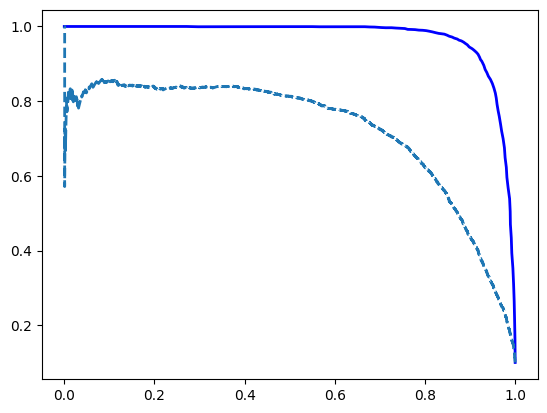

In [47]:
plt.plot(recalls_forest, precisions_forest, "b-", linewidth=2,
label="Random Forest")
plt.plot(recalls, precisions, "--", linewidth=2, label="SGD")
 # beautify the figure: add labels, grid, and legend
plt.show()

In [48]:
from sklearn.svm import SVC 

In [49]:
svm_clf = SVC(random_state = 42 )
svm_clf.fit(X_train[:2000] , y_train[:2000])

SVC(random_state=42)

In [50]:
svm_clf.predict([X[4]])

array([9])

In [51]:
some_digit_scores = svm_clf.decision_function([X[4]])
some_digit_scores.round(2)

array([[-0.29,  3.77,  2.75,  3.75,  8.28,  2.81,  0.72,  7.28,  6.19,
         9.31]])

In [52]:
class_id = some_digit_scores.argmax()
class_id

9

In [53]:
svm_clf.classes_[class_id]

9

In [54]:
from sklearn.multiclass import OneVsRestClassifier
ovr_clf = OneVsRestClassifier(SVC(random_state = 42))

ovr_clf.fit(X_train[:2000] , y_train[:2000])

OneVsRestClassifier(estimator=SVC(random_state=42))

In [55]:
ovr_clf.predict([some_digit])

array([9])

In [56]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train)


SGDClassifier(random_state=42)

In [57]:
sgd_clf.predict([some_digit])


array([9])

In [58]:
sgd_clf.decision_function([some_digit]).round()

array([[-61716., -38125., -42099., -17000.,  -5045., -13348., -35884.,
         -5404., -11697.,   3702.]])

In [59]:
cross_val_score(sgd_clf,X_train,y_train,cv=3,scoring='accuracy')

array([0.85873333, 0.8566    , 0.87653333])

In [60]:
## Want improve the accuracy 

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")




/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


array([0.90426667, 0.90533333, 0.89553333])

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


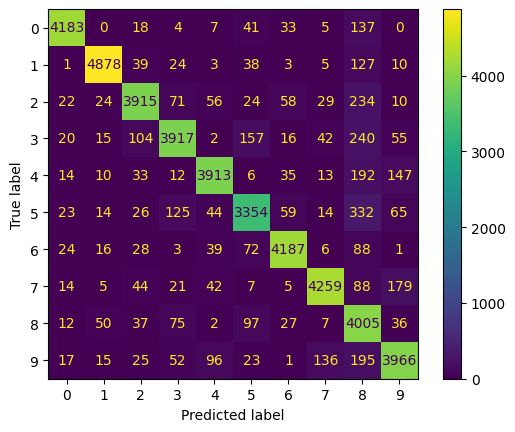

In [61]:
 from sklearn.metrics import ConfusionMatrixDisplay
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)
plt.show()


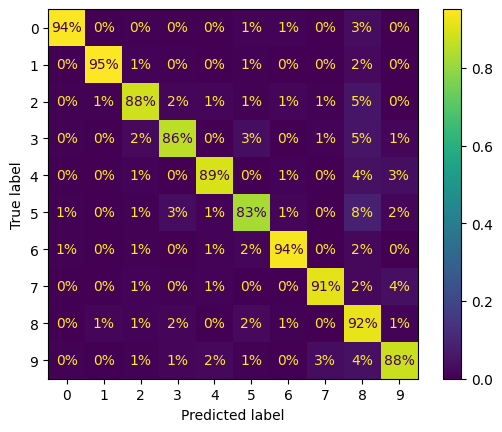

In [62]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred,
normalize="true", values_format=".0%")
plt.show()

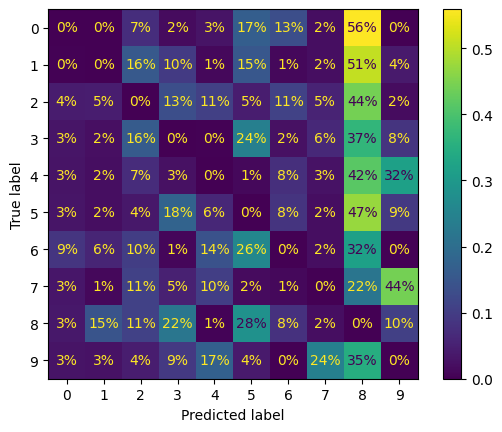

In [63]:
sample_weights = (y_train_pred != y_train)

ConfusionMatrixDisplay.from_predictions(y_train , y_train_pred,sample_weight = sample_weights,
                                      
                                      normalize="true", values_format=".0%")

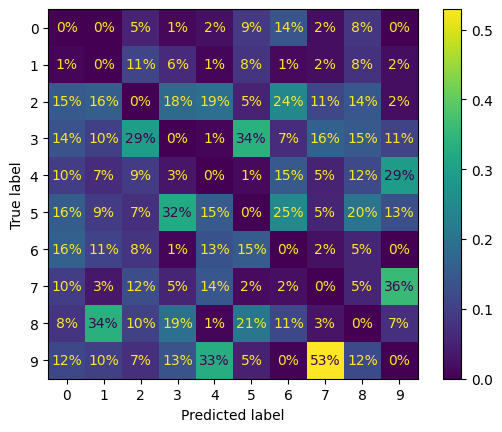

In [64]:
sample_weights = (y_train_pred != y_train)

ConfusionMatrixDisplay.from_predictions(y_train , y_train_pred,sample_weight = sample_weights,
                                      
                                      normalize="pred", values_format=".0%")

In [65]:
cl_a, cl_b = 3, 5
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

In [66]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
y_train_large = (y_train >= 7)
y_train_odd = (y_train.astype('int8') % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier()

In [67]:
knn_clf.predict([some_digit])

array([[ True,  True]])

In [68]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)

In [69]:
f1_score(y_multilabel, y_train_knn_pred, average="macro")

0.9741639525290923

In [70]:
f1_score(y_multilabel, y_train_knn_pred, average="weighted")

0.9756435810130865

In [71]:
from sklearn.multioutput import ClassifierChain
chain_clf = ClassifierChain(SVC(), cv=3, random_state=42)
chain_clf.fit(X_train[:2000], y_multilabel[:2000])

ClassifierChain(base_estimator=SVC(), cv=3, random_state=42)

In [72]:
chain_clf.predict([some_digit])

array([[1., 1.]])

In [73]:
np.random.seed(42) # to make this code example reproducible
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test


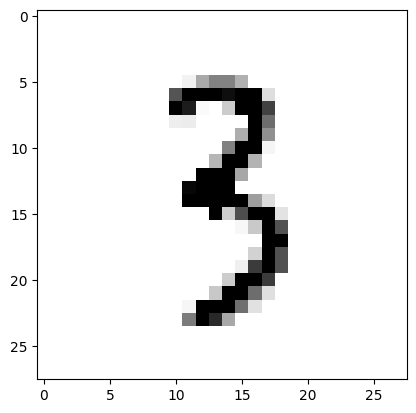

In [74]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[0]])
plot_digit(clean_digit)
plt.show()